# Notebook include descriptive statistics about jobs opportunities

<span style="color: red;font-size:30px;">1 Read the data</span>

In [17]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(stringr)
options(warn=-1)

### Read the Data Analyst jobs data

In [18]:
DA_Data=read.csv("DataAnalyst.csv")

In [19]:
print(names(DA_Data))

 [1] "X"                 "Job.Title"         "Salary.Estimate"  
 [4] "Job.Description"   "Rating"            "Company.Name"     
 [7] "Location"          "Headquarters"      "Size"             
[10] "Founded"           "Type.of.ownership" "Industry"         
[13] "Sector"            "Revenue"           "Competitors"      
[16] "Easy.Apply"       


### Read the Data Scientist jobs data

In [20]:
DS_Data=read.csv("DataScientist.csv")

In [21]:
print(names(DS_Data))

 [1] "X"                 "index"             "Job.Title"        
 [4] "Salary.Estimate"   "Job.Description"   "Rating"           
 [7] "Company.Name"      "Location"          "Headquarters"     
[10] "Size"              "Founded"           "Type.of.ownership"
[13] "Industry"          "Sector"            "Revenue"          
[16] "Competitors"       "Easy.Apply"       


### Read the Data Engineer jobs data

In [22]:
DE_Data=read.csv("DataEngineer.csv")

In [23]:
print(names(DE_Data))

 [1] "Job.Title"         "Salary.Estimate"   "Job.Description"  
 [4] "Rating"            "Company.Name"      "Location"         
 [7] "Headquarters"      "Size"              "Founded"          
[10] "Type.of.ownership" "Industry"          "Sector"           
[13] "Revenue"           "Competitors"       "Easy.Apply"       


### Dimensional uniformity

In [24]:
DA_Data["X"] <- NULL
DS_Data["X"] <- NULL
DS_Data["index"] <- NULL

DA_Data <- DA_Data %>% add_column(job.category = factor("DA")) 
DS_Data <- DS_Data %>% add_column(job.category = factor("DS")) 
DE_Data <- DE_Data %>% add_column(job.category = factor("DE")) 

### All together

In [25]:
Data =rbind(DA_Data, DS_Data ,DE_Data )

<span style="color: red;font-size:30px;">2 Discovering the Data</span>

In [26]:
Data[c(1,2,3000,4000,7000,8000),-3]

,Job.Title,Salary.Estimate,Rating,Company.Name,Location,Headquarters,Size,Founded,Type.of.ownership,Industry,Sector,Revenue,Competitors,Easy.Apply,job.category
1,"Data Analyst, Center on Immigration and Justice (CIJ)",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice 3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,DA
2,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York 3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,DA
3000,Statistician (Data Scientist) *12 month Roster* *Direct Hire*,$79K-$130K (Glassdoor est.),3.5,Internal Revenue Service 3.5,"Chicago, IL","Washington, DC",10000+ employees,1862,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1,-1,DS
4000,Lead Process Development Scientist - Upstream,$65K-$100K (Glassdoor est.),3.2,Spark Therapeutics 3.2,"Philadelphia, PA","Philadelphia, PA",201 to 500 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),-1,-1,DS
7000,Data Engineer,$79K-$104K (Glassdoor est.),3.3,Swift Refrigerated 3.3,"Phoenix, AZ","Phoenix, AZ",10000+ employees,1966,Company - Public,Trucking,Transportation & Logistics,$2 to $5 billion (USD),-1,-1,DE
8000,Data Engineer,$164K-$192K (Glassdoor est.),3.9,PayPal 3.9,"San Jose, CA","San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,$10+ billion (USD),"Square, Amazon, Apple",-1,DE


#### Dimensions

In [27]:
dim(Data)

[1] 8690   16

In [28]:
summary(Data)

                Job.Title                        Salary.Estimate
 Data Engineer       : 729   $60K-$124K (Glassdoor est.) :  62  
 Data Analyst        : 656   $93K-$151K (Glassdoor est.) :  62  
 Data Scientist      : 282   $94K-$166K (Glassdoor est.) :  62  
 Senior Data Engineer: 140   $60K-$109K (Glassdoor est.) :  62  
 Senior Data Analyst : 137   $43K-$76K (Glassdoor est.)  :  61  
 Big Data Engineer   : 114   $113K-$180K (Glassdoor est.):  61  
 (Other)             :6632   (Other)                     :8320  
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [29]:
str(Data)

'data.frame':	8690 obs. of  16 variables:
 $ Job.Title        : Factor w/ 3973 levels "#104252 Division Data and Financial Analyst",..: 432 905 1030 226 923 226 165 575 226 441 ...
 $ Salary.Estimate  : Factor w/ 318 levels "-1","$110K-$190K (Glassdoor est.)",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ Job.Description  : Factor w/ 6998 levels "--- This is a 3-6 month full-time internship opening ---\n\nDo you love data?\n\nAre you passionate about drivi"| __truncated__,..: 180 1419 2197 1674 71 67 2101 496 1935 121 ...
 $ Rating           : num  3.2 3.8 3.4 4.1 3.9 3.9 4.4 3.7 4 4.4 ...
 $ Company.Name     : Factor w/ 3627 levels "","1","1199SEIU Funds\n3.2",..: 1425 1448 1210 239 483 1007 1370 556 395 1089 ...
 $ Location         : Factor w/ 334 levels "Addison, TX",..: 155 155 155 155 155 155 155 155 155 155 ...
 $ Headquarters     : Factor w/ 816 levels "-1","Abbott Park, IL",..: 293 293 293 250 293 414 293 293 235 293 ...
 $ Size             : Factor w/ 9 levels "-1","1 to 50 employee

In [30]:
print(names(Data))

 [1] "Job.Title"         "Salary.Estimate"   "Job.Description"  
 [4] "Rating"            "Company.Name"      "Location"         
 [7] "Headquarters"      "Size"              "Founded"          
[10] "Type.of.ownership" "Industry"          "Sector"           
[13] "Revenue"           "Competitors"       "Easy.Apply"       
[16] "job.category"     


<span style="color: red;font-size:30px;">3 Discovering each column in
detail</span>

### Job Title

In [31]:
print(Data$Job.Title[1:10],max.levels=0);

 [1] Data Analyst, Center on Immigration and Justice (CIJ)               
 [2] Quality Data Analyst                                                
 [3] Senior Data Analyst, Insights & Analytics Team [Customer Operations]
 [4] Data Analyst                                                        
 [5] Reporting Data Analyst                                              
 [6] Data Analyst                                                        
 [7] Business/Data Analyst (FP&A)                                        
 [8] Data Science Analyst                                                
 [9] Data Analyst                                                        
[10] Data Analyst, Merchant Health                                       


### Salary Estimate

In [32]:
print(Data$Salary.Estimate[50:65],max.levels=0);

 [1] $46K-$87K (Glassdoor est.) $46K-$87K (Glassdoor est.)
 [3] $46K-$87K (Glassdoor est.) $46K-$87K (Glassdoor est.)
 [5] $46K-$87K (Glassdoor est.) $46K-$87K (Glassdoor est.)
 [7] $46K-$87K (Glassdoor est.) $46K-$87K (Glassdoor est.)
 [9] $46K-$87K (Glassdoor est.) $46K-$87K (Glassdoor est.)
[11] $46K-$87K (Glassdoor est.) $51K-$88K (Glassdoor est.)
[13] $51K-$88K (Glassdoor est.) $51K-$88K (Glassdoor est.)
[15] $51K-$88K (Glassdoor est.) $51K-$88K (Glassdoor est.)


### Job Description

In [33]:
print(Data$Job.Description[1],max.levels=0);

[1] Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?\n\nWe are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.\n\nWho we are:\n\nFounded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.\nWe study problems that

### Rating

In [34]:
print(unique(Data$Rating))

 [1]  3.2  3.8  3.4  4.1  3.9  4.4  3.7  4.0 -1.0  3.0  3.6  4.9  3.3  3.5  5.0
[16]  4.8  4.7  4.6  2.9  1.0  3.1  4.5  2.3  4.2  2.8  4.3  2.7  2.5  2.6  2.4
[31]  2.0  2.1  1.7  2.2  1.8  1.6  1.9  1.5


### Location

In [35]:
print(unique(Data$Location)[1:10],max.levels=0);

 [1] New York, NY         Fairfield, NJ        Jersey City, NJ     
 [4] Brooklyn, NY         Weehawken, NJ        Long Island City, NY
 [7] Florham Park, NJ     Manhasset, NY        Newark, NJ          
[10] Queens Village, NY  


### Headquarters

In [36]:
print(unique(Data$Headquarters)[1:10],max.levels=0);

 [1] New York, NY           McLean, VA             Stamford, CT          
 [4] London, United Kingdom -1                     Bronx, NY             
 [7] Phoenix, AZ            Rome, NY               Waltham, MA           
[10] Mountain View, CA     


### Size

In [37]:
print(unique(Data$Size),max.levels=0);

[1] 201 to 500 employees    10000+ employees        1001 to 5000 employees 
[4] 501 to 1000 employees   5001 to 10000 employees 1 to 50 employees      
[7] 51 to 200 employees     Unknown                 -1                     


### Founded

In [38]:
print(unique(Data$Founded)[1:10],max.levels=0);

 [1] 1961 1893 2003 2002 2009 2014 2001 1914 1896 2013


### Ownership

In [39]:
print(unique(Data$Type.of.ownership),max.levels=0);

 [1] Nonprofit Organization         Company - Private             
 [3] Subsidiary or Business Segment Company - Public              
 [5] Hospital                       Unknown                       
 [7] Contract                       -1                            
 [9] Government                     School / School District      
[11] Other Organization             College / University          
[13] Self-employed                  Private Practice / Firm       
[15] Franchise                     


### Industry

In [40]:
print(unique(Data$Industry)[1:10],max.levels=0);

 [1] Social Assistance                     Health Care Services & Hospitals     
 [3] Internet                              IT Services                          
 [5] Sports & Recreation                   Investment Banking & Asset Management
 [7] Insurance Carriers                    Venture Capital & Private Equity     
 [9] Research & Development                -1                                   


### Sector

In [41]:
print(unique(Data$Sector)[1:10],max.levels=0);

 [1] Non-Profit                        Health Care                      
 [3] Information Technology            Arts, Entertainment & Recreation 
 [5] Finance                           Insurance                        
 [7] Business Services                 -1                               
 [9] Restaurants, Bars & Food Services Media                            


### Revenue

In [42]:
print(unique(Data$Revenue),max.levels=0);

 [1] $100 to $500 million (USD)       $2 to $5 billion (USD)          
 [3] Unknown / Non-Applicable         $50 to $100 million (USD)       
 [5] $1 to $2 billion (USD)           $5 to $10 billion (USD)         
 [7] $1 to $5 million (USD)           $25 to $50 million (USD)        
 [9] $10+ billion (USD)               Less than $1 million (USD)      
[11] $10 to $25 million (USD)         -1                              
[13] $500 million to $1 billion (USD) $5 to $10 million (USD)         


### Competitors

In [43]:
print(unique(Data$Competitors[1:10]),max.levels=0);

[1] -1                               GoDaddy                         
[3] DraftKings                       Travelers, Chubb, Crum & Forster
[5] Thomson Reuters, Hearst, Pearson Signifyd, Forter                


### Easy to Apply

In [44]:
print(unique(Data$Easy.Apply),max.levels=0);

[1] True -1  


<span style="color: red;font-size:30px;">4 Data cleaning and
preparation</span>

### Remove (Putting a mark) incorrect data

In [45]:
Data[Data == "-1"] <- NA
Data[Data == -1] <- NA
Data[Data == "Unknown"] <- NA
Data[Data == "Unknown / Non-Applicable"] <- NA

### Create columns to record the skills in it

In [46]:
Data <- Data %>%
        add_column(Python = NA) %>% 
        add_column(R = NA) %>% 
        add_column(SQL = NA) %>%
        add_column(Spark = NA) %>%
        add_column(Excel = NA) %>%
        add_column(PowerBI = NA) %>%
        add_column(Git = NA) %>%
        add_column(GitHub = NA)

### Text processing to extract skills from the job description

In [47]:
generalConvertor <- function(description,skill){
  lower_description = tolower(description)
  exist = grepl(skill, lower_description)
  return(ifelse(exist,1,0))
}

R_Convertor <- function(description){
  lower_description = tolower(description)
  con1 = grepl(" r ", lower_description)
  con2 = grepl(", r ", lower_description)
  con3 = grepl(" r,", lower_description)
  return(ifelse( (con1 | con2 | con3) ,1,0))
}


Data[c("Python")]  <- lapply(Data["Job.Description"], generalConvertor, skill="python")

Data[c("R")]       <- lapply(Data["Job.Description"], R_Convertor)

Data[c("SQL")]     <- lapply(Data["Job.Description"], generalConvertor, skill="sql")
Data[c("Spark")]   <- lapply(Data["Job.Description"], generalConvertor, skill="spark")
Data[c("Excel")]   <- lapply(Data["Job.Description"], generalConvertor, skill="excel")
Data[c("PowerBI")] <- lapply(Data["Job.Description"], generalConvertor, skill="power bi")
Data[c("Git")]     <- lapply(Data["Job.Description"], generalConvertor, skill="git")
Data[c("GitHub")]  <- lapply(Data["Job.Description"], generalConvertor, skill="github")

### Create columns to record the Beginning Salary and the Ending Salary

In [48]:
Data <- Data %>%
        add_column(BeginningSalary =  NA) %>% 
        add_column(EndingSalary =  NA)  

### Text processing to extractthe Beginning Salary and the Ending Salary (using regular expressions)

In [49]:
extractSalary <- function(text_salary,lim){
 gfg_numbers <- regmatches( text_salary, gregexpr("[[:digit:]]+", text_salary) )
 return(as.numeric(unlist(gfg_numbers)[lim])*1000)
}

Data[c("BeginningSalary")]  <- apply(Data["Salary.Estimate"],1, extractSalary,lim=1)
Data[c("EndingSalary")]    <- apply(Data["Salary.Estimate"], 1,extractSalary, lim=2)

### Create columns to record the state

In [50]:
Data <- Data %>%
        add_column(US.postal.abbreviation =  NA) 

### Text processing by cutting the US postal abbreviation

In [51]:
extractCode <- function(a) {
  
   exist = grepl("United Kingdom", a)
  if(exist){
    return(NA)
  }else{
  code = substr(a , nchar(a)-1 , nchar(a))
  return(code)
  }
}   

Data[c("US.postal.abbreviation")]  <- apply(Data["Location"],1, extractCode)
Data$US.postal.abbreviation= as.factor(Data$US.postal.abbreviation)

### Look again to dimensions

In [52]:
dim(Data)

[1] 8690   27

In [53]:
summary(Data)

                Job.Title                       Salary.Estimate
 Data Engineer       : 729   $60K-$124K (Glassdoor est.):  62  
 Data Analyst        : 656   $93K-$151K (Glassdoor est.):  62  
 Data Scientist      : 282   $94K-$166K (Glassdoor est.):  62  
 Senior Data Engineer: 140   $60K-$109K (Glassdoor est.):  62  
 Senior Data Analyst : 137   $43K-$76K (Glassdoor est.) :  61  
 Big Data Engineer   : 114   (Other)                    :8380  
 (Other)             :6632   NA's                       :   1  
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        


<span style="color: red;font-size:30px;">5 Insights from the data</span>

### 5.1-Skills

In [54]:
newData = filter(Data,job.category=="DA")

Python = nrow(newData[newData$Python == 1,])
R     = nrow(newData[newData$R == 1,])
SQL     = nrow(newData[newData$SQL == 1,])
Spark  = nrow(newData[newData$Spark == 1,])
Excel= nrow(newData[newData$Excel == 1,])
PowerBI= nrow(newData[newData$PowerBI == 1,])
Git= nrow(newData[newData$Git == 1,])
GitHub= nrow(newData[newData$GitHub == 1,])

skillsTable = data.frame(skillName =c("Python","R","SQL","Spark","Excel","PowerBI","Git","GitHub") ,
                       number =( ceiling( (c(Python,R,SQL,Spark,Excel,PowerBI,Git,GitHub)/nrow(newData))*100)) )

skillsTable

skillName,number
Python,29
R,14
SQL,62
Spark,4
Excel,61
PowerBI,8
Git,14
GitHub,1


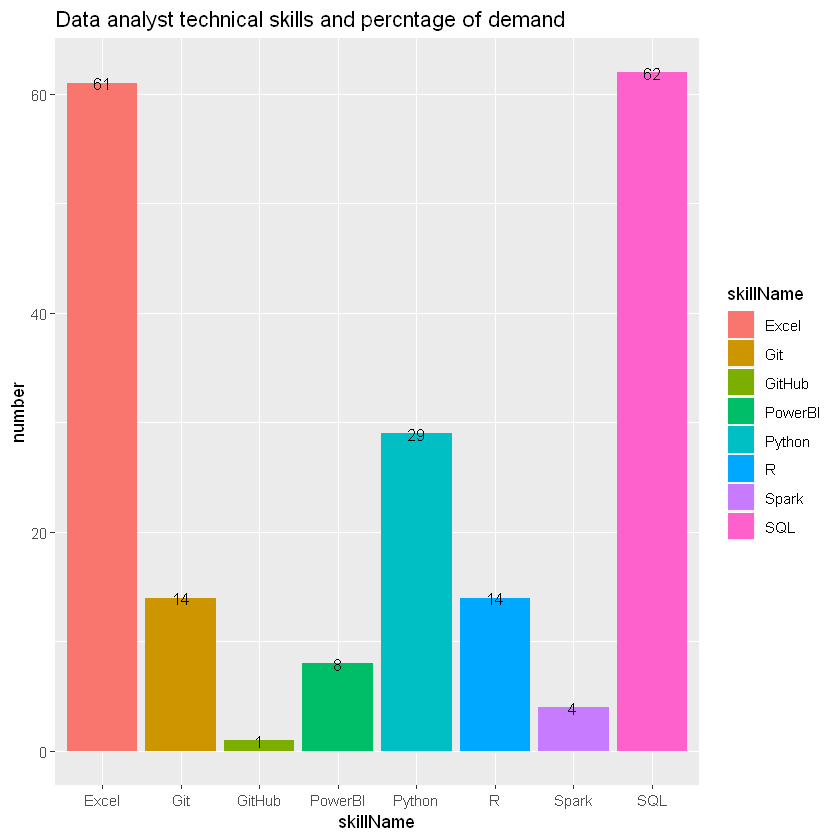

In [55]:
p<-ggplot(skillsTable, aes(x=skillName, y=number , fill = skillName) ) +
  geom_bar(stat="identity") + geom_text(aes(label=number), vjust=.5, color="black", size=3.5) +
   ggtitle("Data analyst technical skills and percntage of demand")
p

![](All-Data_files/figure-gfm/unnamed-chunk-40-1.png)<!-- -->

In [56]:
newData2 = filter(Data,job.category=="DS")

Python = nrow(newData2[newData2$Python == 1,])
R     = nrow(newData2[newData2$R == 1,])
SQL     = nrow(newData2[newData2$SQL == 1,])
Spark  = nrow(newData2[newData2$Spark == 1,])
Excel= nrow(newData2[newData2$Excel == 1,])
PowerBI= nrow(newData2[newData2$PowerBI == 1,])
Git= nrow(newData2[newData2$Git == 1,])
GitHub= nrow(newData2[newData2$GitHub == 1,])

skillsTable2 = data.frame(skillName =c("Python","R","SQL","Spark","Excel","PowerBI","Git","GitHub") ,
                        number =( ceiling( (c(Python,R,SQL,Spark,Excel,PowerBI,Git,GitHub)/nrow(newData))*100)) )

skillsTable2

skillName,number
Python,92
R,38
SQL,90
Spark,40
Excel,83
PowerBI,9
Git,32
GitHub,4


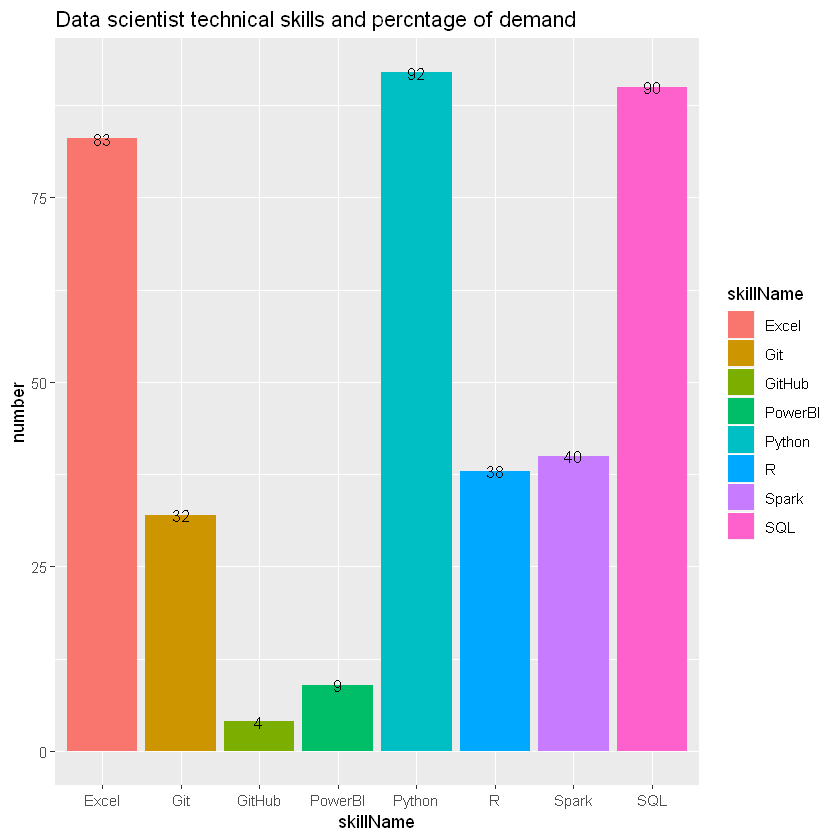

In [57]:
p<-ggplot(skillsTable2, aes(x=skillName, y=number , fill = skillName) ) +
  geom_bar(stat="identity") + geom_text(aes(label=number), vjust=.5, color="black", size=3.5)+
  ggtitle("Data scientist technical skills and percntage of demand")
p

![](All-Data_files/figure-gfm/unnamed-chunk-42-1.png)<!-- -->

In [58]:
newData3 = filter(Data,job.category=="DE")

Python = nrow(newData3[newData3$Python == 1,])
R     = nrow(newData3[newData3$R == 1,])
SQL     = nrow(newData3[newData3$SQL == 1,])
Spark  = nrow(newData3[newData3$Spark == 1,])
Excel= nrow(newData3[newData3$Excel == 1,])
PowerBI= nrow(newData3[newData3$PowerBI == 1,])
Git= nrow(newData3[newData3$Git == 1,])
GitHub= nrow(newData3[newData3$GitHub == 1,])

skillsTable3 = data.frame(skillName =c("Python","R","SQL","Spark","Excel","PowerBI","Git","GitHub") ,
                        number =( ceiling( (c(Python,R,SQL,Spark,Excel,PowerBI,Git,GitHub)/nrow(newData))*100)) )

skillsTable3

skillName,number
Python,62
R,8
SQL,64
Spark,38
Excel,39
PowerBI,4
Git,30
GitHub,4


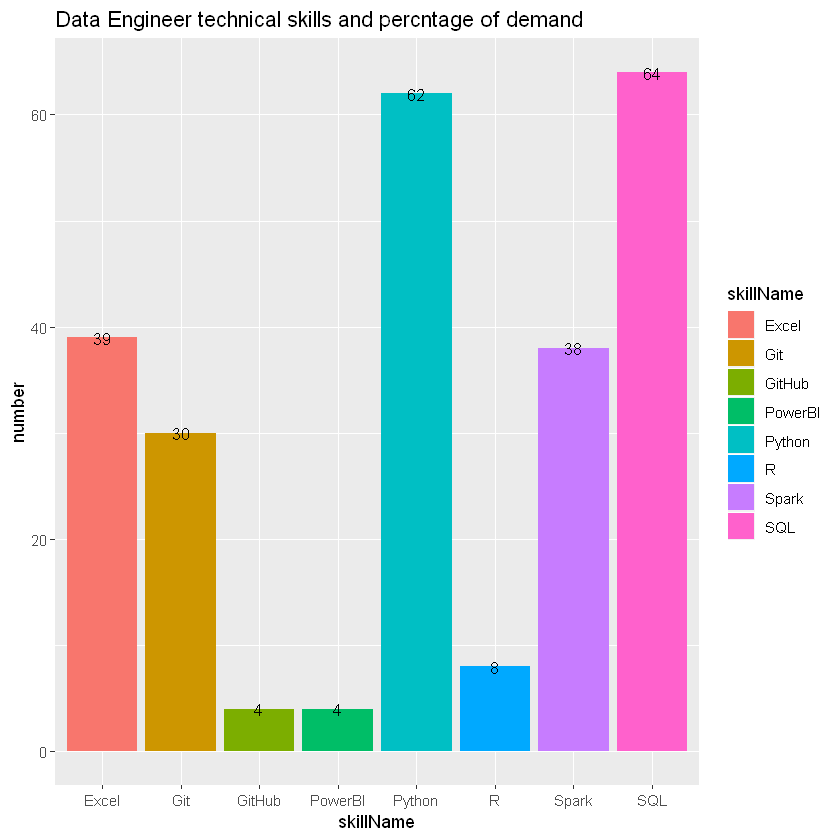

In [59]:
p<-ggplot(skillsTable3, aes(x=skillName, y=number , fill = skillName) ) +
  geom_bar(stat="identity") + geom_text(aes(label=number), vjust=.5, color="black", size=3.5) +
  ggtitle("Data Engineer technical skills and percntage of demand")
p

![](All-Data_files/figure-gfm/unnamed-chunk-44-1.png)<!-- -->

### 5.2-Places with higher job opportunities

In [60]:
place1 <- filter(Data,job.category=="DA")
place1 <- group_by(place1,US.postal.abbreviation)
place1 <-arrange(summarise(place1,number = round(n()/nrow(place1) *100,2 )) , desc(number) )

theRest = 100-sum(apply(as.matrix.noquote(place1["number"]),2,as.numeric)[1:5])
allTogather = place1[c(1,2,3,4,5),] 
allTogather = allTogather %>% add_row(US.postal.abbreviation = "all other states and cities", number = theRest)
allTogather$number=paste(allTogather$number, "%")
allTogather

US.postal.abbreviation,number
CA,27.79 %
TX,17.49 %
NY,15.31 %
IL,7.28 %
PA,5.06 %
all other states and cities,27.07 %


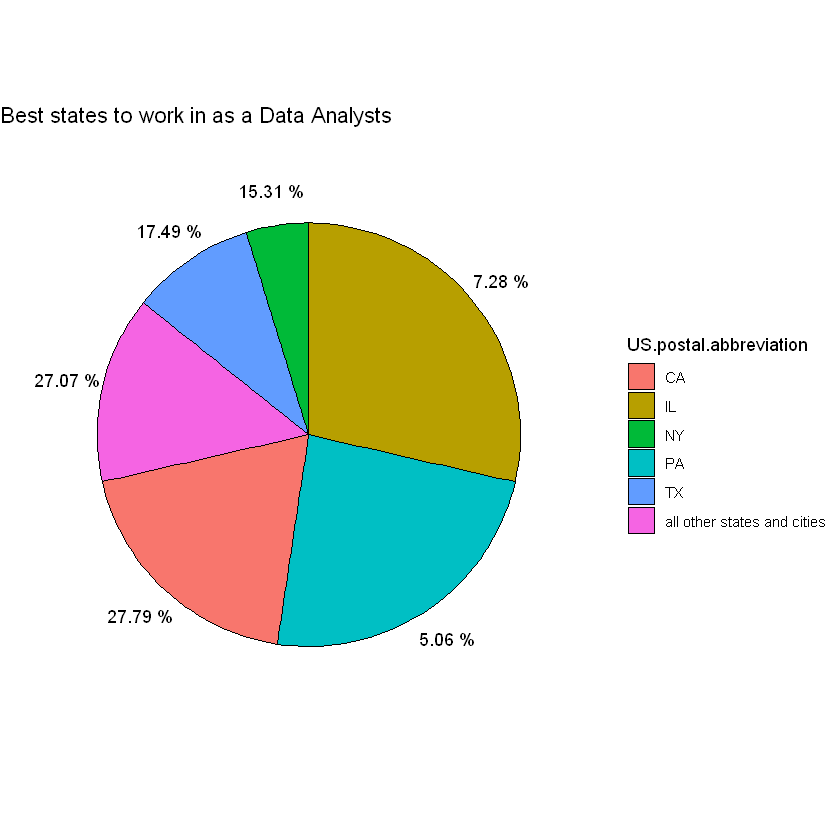

In [61]:
ggplot( allTogather  , aes(x = "", y = number, fill = US.postal.abbreviation)) +
geom_col(color = "black") +
geom_text(aes(x = 1.6,label = number),position = position_stack(vjust = 0.5)) +
coord_polar(theta = "y",start=0) +
ggtitle("Best states to work in as a Data Analysts")+
theme_void()

![](All-Data_files/figure-gfm/unnamed-chunk-46-1.png)<!-- -->

In [62]:
place2 <- filter(Data,job.category=="DS")
place2 <- group_by(place2,US.postal.abbreviation)
place2 <-arrange(summarise(place2,number = round(n()/nrow(place2) *100,2 )) , desc(number) )

theRest2 = 100-sum(apply(as.matrix.noquote(place2["number"]),2,as.numeric)[1:5])
allTogather2 = place2[c(1,2,3,4,5),] 
allTogather2 = allTogather2 %>% add_row(US.postal.abbreviation = "all other states and cities", number = theRest2)
allTogather2

US.postal.abbreviation,number
TX,32.05
CA,27.35
IL,9.29
PA,8.29
NY,8.01
all other states and cities,15.01


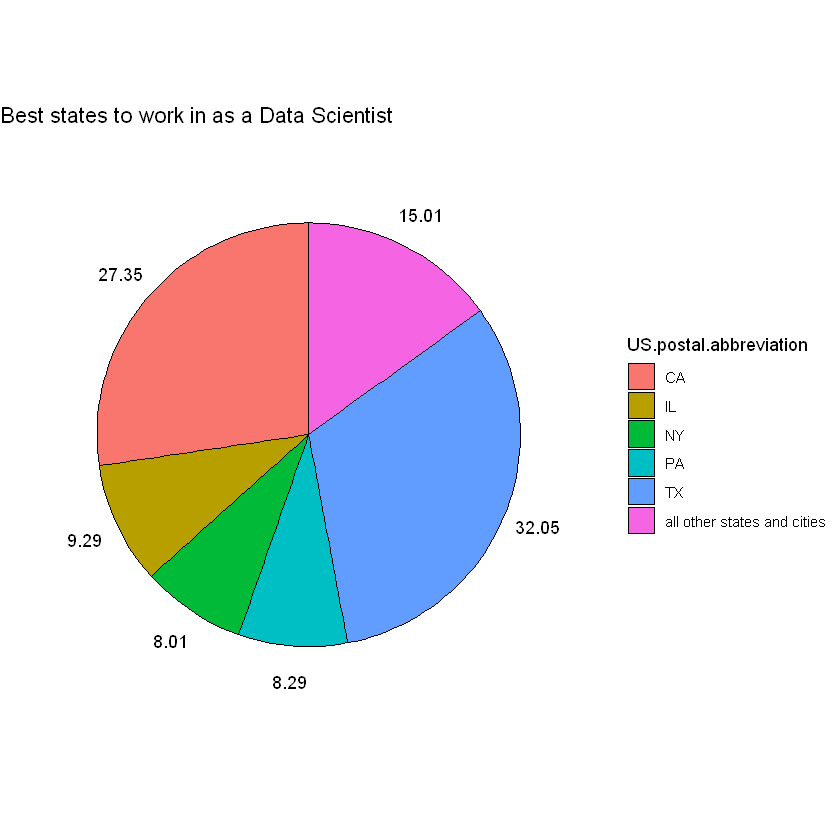

In [63]:
ggplot(allTogather2, aes(x = "", y = number, fill = US.postal.abbreviation)) +
geom_col(color = "black") +
geom_text(aes(x = 1.6,label = number),position = position_stack(vjust = 0.5)) +
coord_polar(theta = "y",start=0) +
ggtitle("Best states to work in as a Data Scientist")+
theme_void()

![](All-Data_files/figure-gfm/unnamed-chunk-48-1.png)<!-- -->

In [64]:
place3 <- filter(Data,job.category=="DE")
place3 <- group_by(place3,US.postal.abbreviation)
place3 <-arrange(summarise(place3,number = round(n()/nrow(place3) *100,2 )) , desc(number) )

theRest3 = 100-sum(apply(as.matrix.noquote(place3["number"]),2,as.numeric)[1:5])
allTogather3 = place3[c(1,2,3,4,5),] 
allTogather3 = allTogather3 %>% add_row(US.postal.abbreviation = "all other states and cities", number = theRest3)
allTogather3

US.postal.abbreviation,number
TX,39.56
CA,23.73
AZ,7.91
IL,7.91
NY,7.40
all other states and cities,13.49


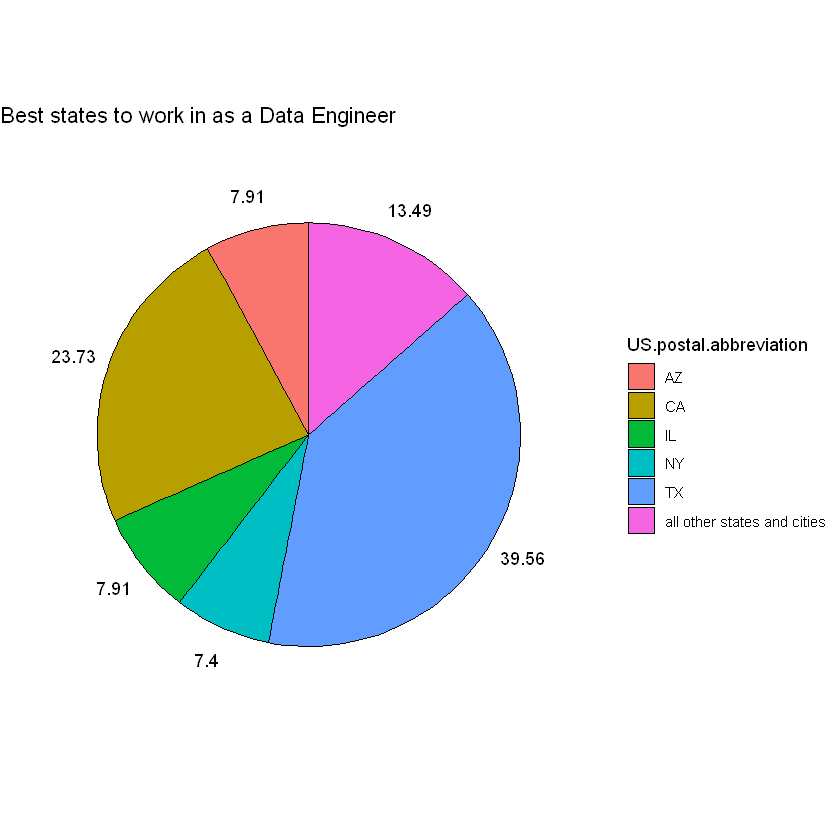

In [65]:
ggplot(allTogather3, aes(x = "", y = number, fill = US.postal.abbreviation)) +
geom_col(color = "black") +
geom_text(aes(x=1.6,label = number),position = position_stack(vjust = 0.5)) +
coord_polar(theta = "y",start=0) +
ggtitle("Best states to work in as a Data Engineer")+
theme_void()

![](All-Data_files/figure-gfm/unnamed-chunk-50-1.png)<!-- -->

### 5.3-Lowest salary you can get against The highest salary you can get

In [66]:
sal1 =  filter(Data,job.category=="DA") %>% drop_na()
cat("As a Data Analysts",paste("\nThe lowest salary that can be obtained at the beginning is",min(sal1$BeginningSalary)) ,paste("\nand Salary can be up to ",max(sal1$EndingSalary)))

As a Data Analysts 
The lowest salary that can be obtained at the beginning is 28000 
and Salary can be up to  129000

In [67]:
sal2 =  filter(Data,job.category=="DS") %>% drop_na()
cat("As a Data scientist",paste("\nThe lowest salary that can be obtained at the beginning is",min(sal2$BeginningSalary)) ,paste("\nand Salary can be up to ",max(sal2$EndingSalary)))

As a Data scientist 
The lowest salary that can be obtained at the beginning is 12000 
and Salary can be up to  237000

In [68]:
sal3 =  filter(Data,job.category=="DE") 
cat("As a Data engineer",paste("\nThe lowest salary that can be obtained at the beginning is",min(sal3$BeginningSalary)) ,paste("\nand Salary can be up to ",max(sal3$EndingSalary)))

As a Data engineer 
The lowest salary that can be obtained at the beginning is 27000 
and Salary can be up to  281000

### 5.4-Most industries need workers

##### 5.4.1-Top industries to work in as Data analyst

In [69]:
Industry1 <- filter(Data,job.category=="DA") 
Industry1 <- group_by(Industry1,Industry)
Industry1 <-arrange(summarise(Industry1,number = n()) , desc(number) )
Industry1[c(2,3,4,5,6,7,8,9,10,11),]

Industry,number
IT Services,325
Staffing & Outsourcing,323
Health Care Services & Hospitals,151
Computer Hardware & Software,111
Consulting,111
Investment Banking & Asset Management,78
Enterprise Software & Network Solutions,69
Internet,65
Advertising & Marketing,51
Banks & Credit Unions,51


#### 5.4.2-Top industries to work in as Data scientist

In [70]:
Industry2 <- filter(Data,job.category=="DS") 
Industry2 <- group_by(Industry2,Industry)
Industry2 <-arrange(summarise(Industry2,number = n()) , desc(number) )
Industry2[c(2,3,4,5,6,7,8,9,10,11),]

Industry,number
IT Services,472
Staffing & Outsourcing,313
Biotech & Pharmaceuticals,293
Computer Hardware & Software,264
Internet,238
Health Care Services & Hospitals,197
Consulting,166
Enterprise Software & Network Solutions,150
Investment Banking & Asset Management,109
Advertising & Marketing,93


#### 5.4.3-Top industries to work in as Data engineer

In [71]:
Industry3 <- filter(Data,job.category=="DE") 
Industry3 <- group_by(Industry3,Industry)
Industry3 <-arrange(summarise(Industry3,number = n()) , desc(number) )
Industry3[c(2,3,4,5,6,7,8,9,10,11),]

Industry,number
IT Services,355
Computer Hardware & Software,244
Staffing & Outsourcing,202
Internet,145
Enterprise Software & Network Solutions,143
Consulting,99
Aerospace & Defense,94
Investment Banking & Asset Management,76
Insurance Carriers,61
Advertising & Marketing,59


### 5.5-The size of companies that want a Data analyst , Data scientist or Data engineer

In [72]:
Size1 <- filter(Data,job.category=="DA") 
Size1 <- group_by(Size1,Size)
Size1 <-arrange(summarise(Size1,number = n()) , desc(number) )
Size1 <-Size1  %>% drop_na()
Size1

Size,number
51 to 200 employees,421
10000+ employees,375
1001 to 5000 employees,348
1 to 50 employees,347
201 to 500 employees,249
501 to 1000 employees,211
5001 to 10000 employees,97


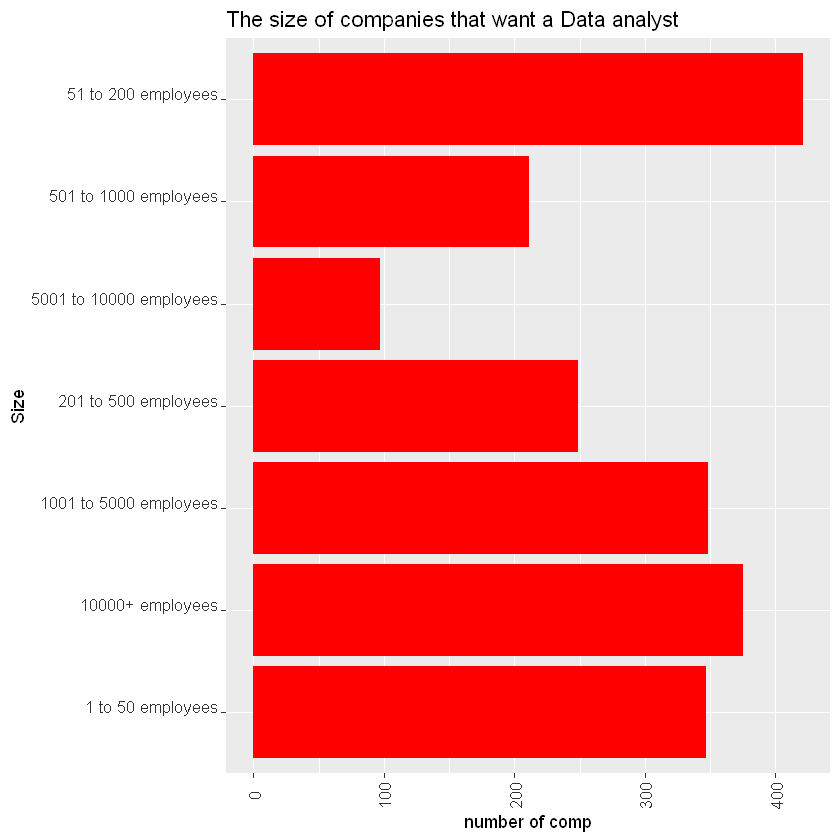

In [73]:
ggplot(Size1,aes(x=Size,y=number)) + 
geom_bar(stat="identity",fill="Red") +
coord_flip() +
theme(axis.text.x = element_text(color = "grey20", size = 10, angle = 90, hjust = .5, vjust = .5, face = "plain"),
        axis.text.y = element_text(color = "grey20", size = 10, angle = 0, hjust = 1, vjust = 0, face = "plain"),)+
ylab("number of comp") + 
xlab("Size") + 
ggtitle("The size of companies that want a Data analyst")

![](All-Data_files/figure-gfm/unnamed-chunk-58-1.png)<!-- -->

In [74]:
Size2 <- filter(Data,job.category=="DS") 
Size2 <- group_by(Size2,Size)
Size2 <-arrange(summarise(Size2,number = n()) , desc(number) )
Size2 <-Size2  %>% drop_na()
Size2

Size,number
10000+ employees,993
51 to 200 employees,563
1001 to 5000 employees,553
1 to 50 employees,550
201 to 500 employees,418
501 to 1000 employees,307
5001 to 10000 employees,219


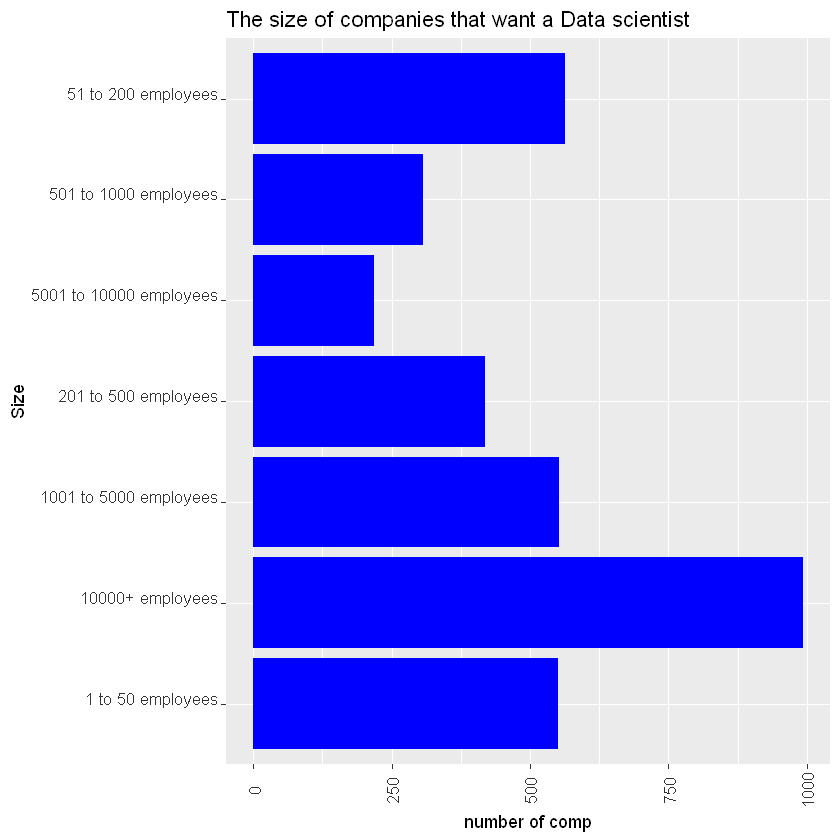

In [75]:
ggplot(Size2,aes(x=Size,y=number)) + 
geom_bar(stat="identity",fill="Blue") +
coord_flip() +
theme(axis.text.x = element_text(color = "grey20", size = 10, angle = 90, hjust = .5, vjust = .5, face = "plain"),
        axis.text.y = element_text(color = "grey20", size = 10, angle = 0, hjust = 1, vjust = 0, face = "plain"), )+
ylab("number of comp") + 
xlab("Size") + 
ggtitle("The size of companies that want a Data scientist")

![](All-Data_files/figure-gfm/unnamed-chunk-60-1.png)<!-- -->

In [76]:
Size3 <- filter(Data,job.category=="DE") 
Size3 <- group_by(Size3,Size)
Size3 <-arrange(summarise(Size3,number = n()) , desc(number) )
Size3 <-Size3  %>% drop_na()
Size3

Size,number
10000+ employees,557
51 to 200 employees,389
1001 to 5000 employees,385
1 to 50 employees,363
201 to 500 employees,272
501 to 1000 employees,247
5001 to 10000 employees,133


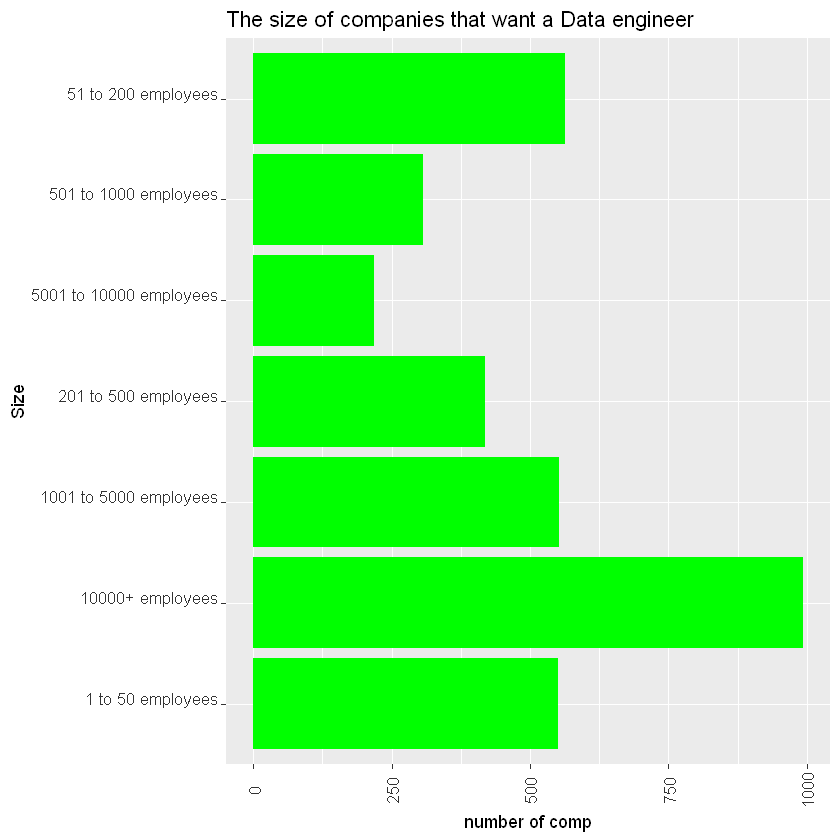

In [77]:
ggplot(Size2,aes(x=Size,y=number)) + 
geom_bar(stat="identity",fill="green") +
coord_flip() +
theme(axis.text.x = element_text(color = "grey20", size = 10, angle = 90, hjust = .5, vjust = .5, face = "plain"),
        axis.text.y = element_text(color = "grey20", size = 10, angle = 0, hjust = 1, vjust = 0, face = "plain"),)+
ylab("number of comp") + 
xlab("Size") +
ggtitle("The size of companies that want a Data engineer")

![](All-Data_files/figure-gfm/unnamed-chunk-62-1.png)<!-- -->